In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

In [39]:
train_targets = pd.read_parquet('data/A/parquet/train_targets.parquet', engine='pyarrow')
x_test_estimated = pd.read_parquet('data/A/parquet/x_test_estimated.parquet', engine='pyarrow')
x_train_estimated = pd.read_parquet('data/A/parquet/x_train_estimated.parquet', engine='pyarrow')
x_train_observed = pd.read_parquet('data/A/parquet/x_train_observed.parquet', engine='pyarrow')

# merge x_train_observed and x_train_estimated and remove the first column in x_train_estimated
x_train = pd.concat([x_train_observed, x_train_estimated.iloc[:, 1:]], axis=0)

# Set indicies to Datetime
x_train.set_index('date_forecast', inplace=True)
train_targets.set_index('time', inplace=True)

In [42]:
# Create features of train_targets
def create_features(df: pd.DataFrame) -> pd.DataFrame:
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    
    return df

train_targets = create_features(train_targets)

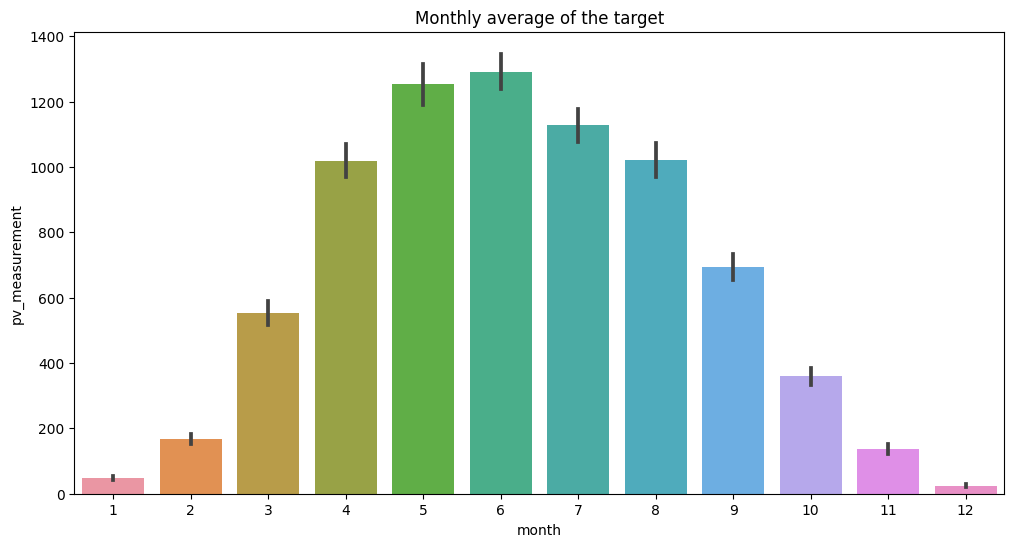

In [48]:
# Plot the monthly average of the target as a bar chart
plt.figure(figsize=(12, 6))
plt.title('Monthly average of the target')
plt.xlabel('Month')
plt.ylabel('PV Measurement')

sns.barplot(data=train_targets, x='month', y='pv_measurement')

plt.show()

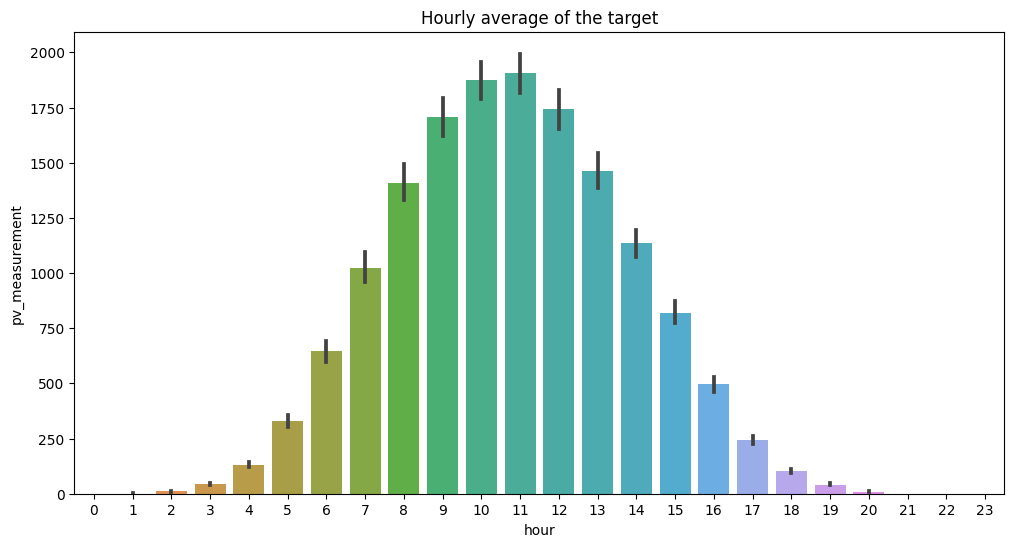

In [49]:
# Plot the hourly average of the target as a bar chart
plt.figure(figsize=(12, 6))
plt.title('Hourly average of the target')
plt.xlabel('Hour')
plt.ylabel('PV Measurement')

sns.barplot(data=train_targets, x='hour', y='pv_measurement')

plt.show()